# Course Project: Supervised Machine Learning Classification

### Objective:

The objective of this report is to enhance the predictions of the wine color data set corresponding to the Wine_Quality_Data. From the results obtained, we will be able to analyze the influence of the different features to determine the wine color. 

### Description of the Data Set and its attributes

The study data set is the one provided in the course. Among the main attributes of the data can be found those described below.

### Predictor

* Color: The color of the wine. 

### Features:

Chemical properties of wine:
												
* fixed_acidity
* volatile_acidity
* citric_acid
* residual_sugar
* chlorides
* free_sulfur_dioxide
* total_sulfur_dioxide
* density
* pH
* sulphates
* alcohol

Quality metric of the wine (3 to 9, with highest being better):

* quality 

# Exploratory Data Analisis
### Initial plan for data exploration and actions for data cleaning and feature engineering.

The data is already correct concerning Data Cleaning. However, we will do the corresponding variables transformations to carry out the different models of the adequate tide. Then we will preliminarily analyze the existing correlations between the features, to generate a better understanding of the data set.

#### Data Cleaning and Feature Engineering

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Analyzing the data set.

In [262]:
filepath = 'Wine_Quality_Data.csv'
data = pd.read_csv(filepath)
display(data)
print(data.info())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


There is no missing data, since this data set have been previously modified. It is also observed that the variable to be predicted is well balanced in terms of its components.

In [263]:
print(data['color'].value_counts())
data.describe(include='object')

white    4898
red      1599
Name: color, dtype: int64


,color
count,6497
unique,2
top,white
freq,4898


Lets encode the predict feature. 

In [264]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['color'] = le.fit_transform(data['color'])
print(data['color'].value_counts(normalize=True))
print(le.classes_)

1    0.753886
0    0.246114
Name: color, dtype: float64
['red' 'white']


We are going to analyze in a preliminary way the correlations between features in order to determine multicollinearity.

<AxesSubplot:>

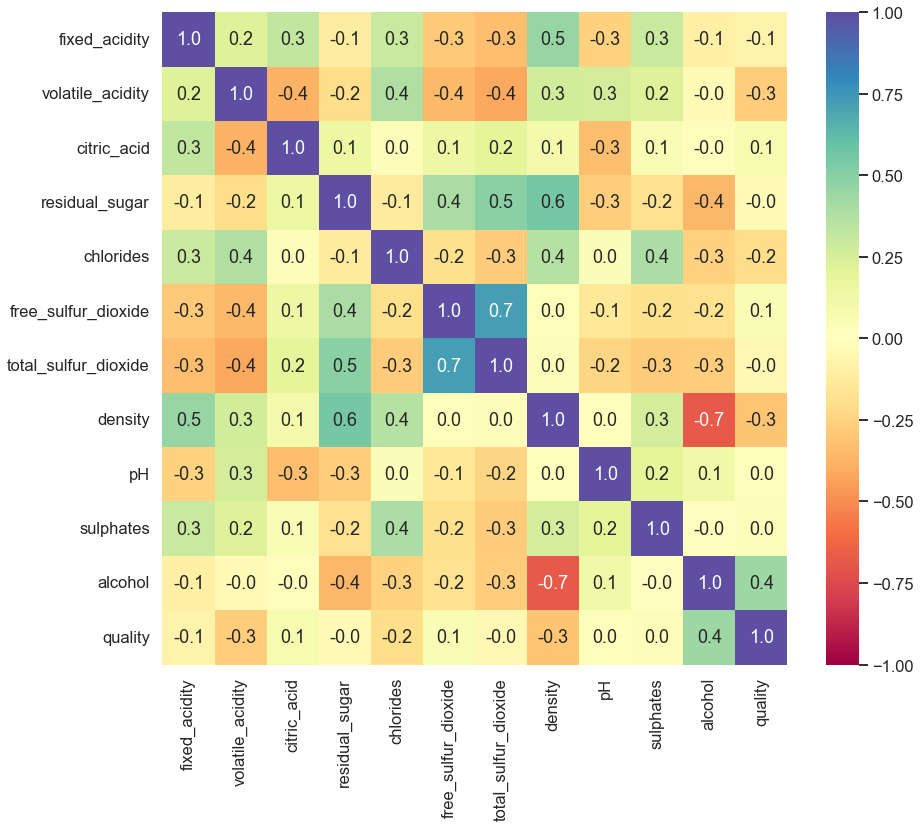

In [265]:
feature_cols = data.columns[:-1]
correlation = data[feature_cols].corr()

f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral")

# Classification Models

Now we are going to develop the following classification models.

* Logistic Regression 
* K-Nearest Neighbors 
* Suport Vector Machines 
* Decision Trees 
* Random Forest & Estra Random Forest
* Gradient Boosting
* Stacking Models

### Training & Test Splits

We are going to ensure that all the models use the same training and test splits.

In [266]:
from sklearn.model_selection import StratifiedShuffleSplit

SSS = StratifiedShuffleSplit(n_splits=1, 
                             test_size=0.3, 
                             random_state=42)

train_idx, test_idx = next(SSS.split(data[feature_cols], data.color))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'color']

In [267]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.753904
0    0.246096
Name: color, dtype: float64
1    0.753846
0    0.246154
Name: color, dtype: float64


## Logistic Regression

Tuning the Hyperparameters 

In [268]:
# L2 regularized logistic regression
from sklearn.linear_model import LogisticRegressionCV

lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
print(lr_l2.C_,lr_l2.coef_)

y_pred = pd.Series(lr_l2.predict(X_test))
y_prob = pd.DataFrame(lr_l2.predict_proba(X_test), columns=['red', 'white'])
y_prob

[10000.] [[ -1.35904847 -10.44243423   1.65148216   0.07732585 -32.79074227
   -0.06179262   0.06715768  18.86665755  -8.91399054  -9.25336534
    0.46349939   0.06679784]]


,red,white
0,0.002091,0.997909
1,0.000002,0.999998
2,0.999225,0.000775
3,0.951433,0.048567
4,0.649839,0.350161
...,...,...
1945,0.001818,0.998182
1946,0.000575,0.999425
1947,0.088742,0.911258
1948,0.000014,0.999986


Scores

In [269]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score

print(classification_report(y_test, y_pred))
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       480
           1       0.99      0.99      0.99      1470

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950

   accuracy  precision    recall        f1       auc
0  0.985641   0.987821  0.993197  0.990502  0.977849


Confusion Matrix

[Text(22.5, 0.5, 'Predicted')]

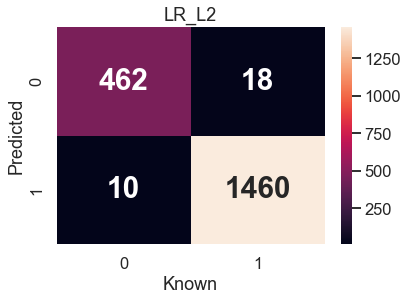

In [270]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})
ax.set(title='LR_L2')
ax.set(xlabel='Known')
ax.set(ylabel='Predicted')

## K-Nearest Neightbors

Since kNN uses distances to evaluate the separation between points, it is necessary to scale the data set.

In [271]:
round(data.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.2,1.3,3.8,6.4,7.0,7.7,15.9
volatile_acidity,6497.0,0.3,0.2,0.1,0.2,0.3,0.4,1.6
citric_acid,6497.0,0.3,0.1,0.0,0.2,0.3,0.4,1.7
residual_sugar,6497.0,5.4,4.8,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,0.1,0.0,0.0,0.0,0.0,0.1,0.6
free_sulfur_dioxide,6497.0,30.5,17.7,1.0,17.0,29.0,41.0,289.0
total_sulfur_dioxide,6497.0,115.7,56.5,6.0,77.0,118.0,156.0,440.0
density,6497.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,6497.0,3.2,0.2,2.7,3.1,3.2,3.3,4.0
sulphates,6497.0,0.5,0.1,0.2,0.4,0.5,0.6,2.0


In [272]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

In [273]:
data_mm = MM.fit_transform(data)

data_mm = pd.DataFrame(data_mm)
data_mm.columns = [col for col in data.columns]
round(data_mm.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,0.3,0.1,0.0,0.2,0.3,0.3,1.0
volatile_acidity,6497.0,0.2,0.1,0.0,0.1,0.1,0.2,1.0
citric_acid,6497.0,0.2,0.1,0.0,0.2,0.2,0.2,1.0
residual_sugar,6497.0,0.1,0.1,0.0,0.0,0.0,0.1,1.0
chlorides,6497.0,0.1,0.1,0.0,0.0,0.1,0.1,1.0
free_sulfur_dioxide,6497.0,0.1,0.1,0.0,0.1,0.1,0.1,1.0
total_sulfur_dioxide,6497.0,0.3,0.1,0.0,0.2,0.3,0.3,1.0
density,6497.0,0.1,0.1,0.0,0.1,0.1,0.2,1.0
pH,6497.0,0.4,0.1,0.0,0.3,0.4,0.5,1.0
sulphates,6497.0,0.2,0.1,0.0,0.1,0.2,0.2,1.0


Using the same training and test splits for all models.

In [274]:
SSS = StratifiedShuffleSplit(n_splits=1,
                             test_size=0.3, 
                             random_state=42)

train_idx, test_idx = next(SSS.split(data_mm[feature_cols], data_mm.color))

X_train = data_mm.loc[train_idx, feature_cols]
y_train = data_mm.loc[train_idx, 'color']

X_test  = data_mm.loc[test_idx, feature_cols]
y_test  = data_mm.loc[test_idx, 'color']

Tuning the Hyperparameters

In [275]:
from sklearn.neighbors import KNeighborsClassifier

max_k = 50
f11_scores = list()
f12_scores = list()

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f11_scores.append((k, round(f1_score(y_test, y_pred), 3)))
f11_results = pd.DataFrame(f11_scores, columns=['K', 'Distance'])

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f12_scores.append((k, round(f1_score(y_test, y_pred), 4)))
f12_results = pd.DataFrame(f12_scores, columns=['K', 'Uniform'])


[Text(0.5, 0, 'K'), Text(0, 0.5, 'F1 Score')]

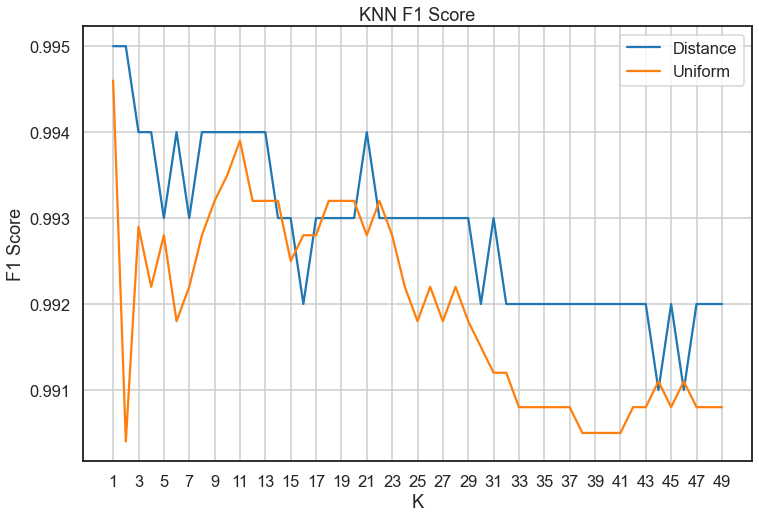

In [276]:
plt.figure(figsize = (12,8), linewidth= 6)
plt.plot(f11_results.iloc[:,0], f11_results.iloc[:,1], ls='-', label='Distance', alpha=1)
plt.plot(f12_results.iloc[:,0], f12_results.iloc[:,1], ls='-', label='Uniform')
plt.legend()
plt.grid()
plt.title('KNN F1 Score')
ax = plt.gca()
ax.set_xticks(range(1, max_k, 2))
ax.set(xlabel='K', ylabel='F1 Score')

Scores

In [277]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       480
         1.0       1.00      0.99      0.99      1470

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

   accuracy  precision    recall        f1       auc
0  0.990769   0.995902  0.991837  0.993865  0.989668


Confusion Matrix

[Text(22.5, 0.5, 'Predicted')]

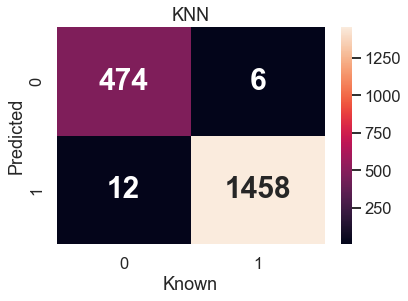

In [278]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})
ax.set(title='KNN')
ax.set(xlabel='Known')
ax.set(ylabel='Predicted')

## Suport Vector Machines

Tuning the Hyperparameters

In [279]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# estimator.get_params().keys()
params = {'C': [0.1,1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), params, cv=4)
 
grid.fit(X_train, y_train)
print(grid.best_estimator_, grid.best_params_)
y_pred = grid.predict(X_test)

SVC(C=1000, gamma=0.1) {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


Scores

In [280]:
print(classification_report(y_test, y_pred))
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       480
         1.0       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       1.00      0.99      1.00      1950
weighted avg       1.00      1.00      1.00      1950

   accuracy  precision    recall       f1       auc
0   0.99641   0.997281  0.997959  0.99762  0.994813


Confusion Matrix

[Text(22.5, 0.5, 'Predicted')]

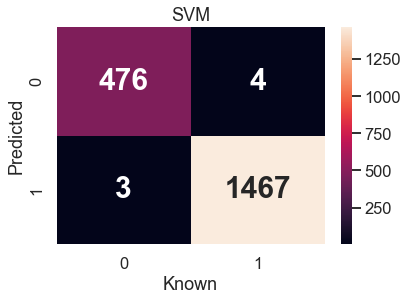

In [281]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})
ax.set(title='SVM')
ax.set(xlabel='Known')
ax.set(ylabel='Predicted')

## Decision Trees

Tuning the Hyperparameters

In [282]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':range(1, 50, 2),
              'max_features': range(1, len(data.columns))}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

# max_features: The number of features to consider when looking for the best split
# scoring = different scoring on which we want to optimize. 
# n_jobs=-1: is how much to parallelize the process, -1 means as much as possible. 

GR = GR.fit(X_train, y_train)
y_test_pred_gr = GR.predict(X_test)

print(GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth)


127 9


Scores

In [283]:
print(classification_report(y_test, y_pred))
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       480
         1.0       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       1.00      0.99      1.00      1950
weighted avg       1.00      1.00      1.00      1950

   accuracy  precision    recall       f1       auc
0   0.99641   0.997281  0.997959  0.99762  0.994813


Confusion Matrix

[Text(22.5, 0.5, 'Predicted')]

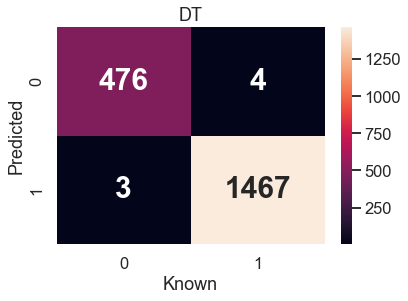

In [284]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})
ax.set(title='DT')
ax.set(xlabel='Known')
ax.set(ylabel='Predicted')

Desicion Tree Classification

In [285]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

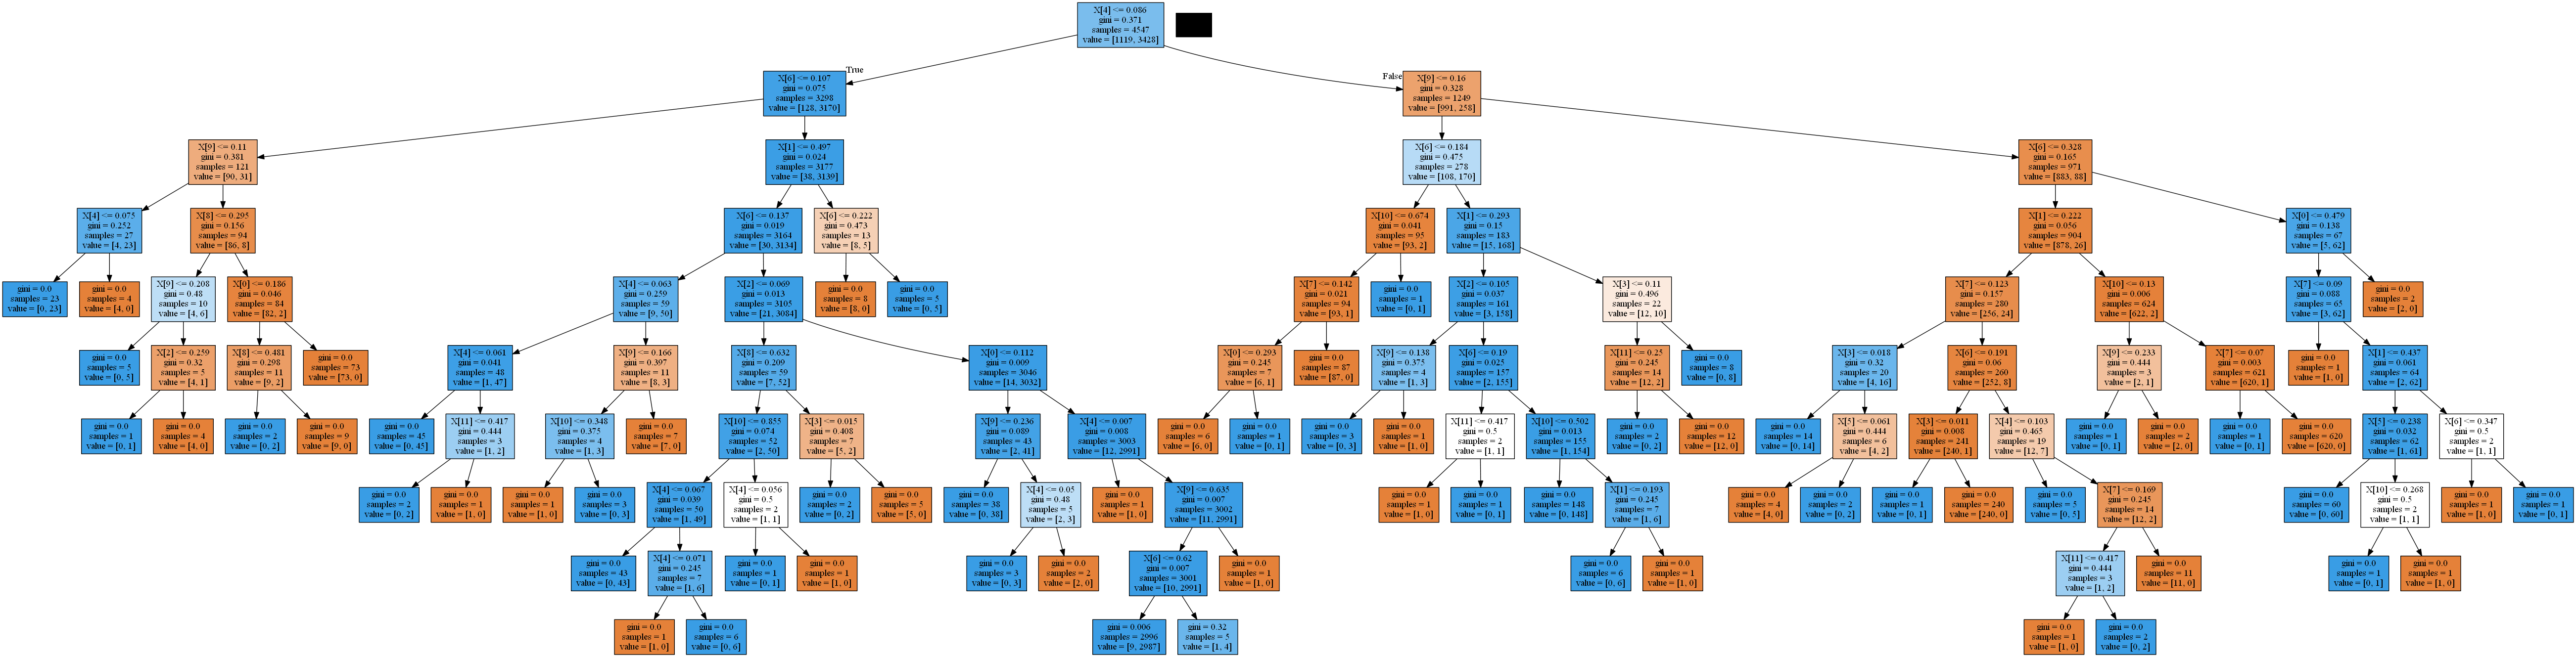

In [286]:
dot_data = StringIO()
export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename) 

## Random Forest & Extra Random Trees

Tuning the Hyperparameters

In [287]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
# ob_score=True: Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
# warm_start=True: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


,oob
n_trees,
15.0,0.008577
20.0,0.009677
30.0,0.006818
40.0,0.006598
50.0,0.005718
100.0,0.005938
150.0,0.005058
200.0,0.005278
300.0,0.005278


In [288]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)
#bootstrap=True: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    ET.set_params(n_estimators=n_trees)
    ET.fit(X_train, y_train)
    oob_error = 1 - ET.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
et_oob_df

C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\enzof\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


,oob
n_trees,
15.0,0.010776
20.0,0.008137
30.0,0.006818
40.0,0.005498
50.0,0.005718
100.0,0.004399
150.0,0.004399
200.0,0.004399
300.0,0.004399


In [289]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.008577,0.010776
20.0,0.009677,0.008137
30.0,0.006818,0.006818
40.0,0.006598,0.005498
50.0,0.005718,0.005718
100.0,0.005938,0.004399
150.0,0.005058,0.004399
200.0,0.005278,0.004399
300.0,0.005278,0.004399


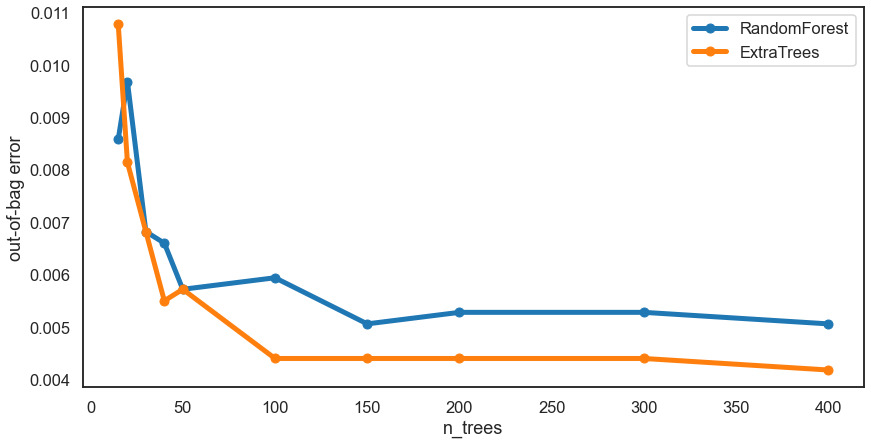

In [290]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

Random Forest with 150 estimators

In [291]:
RF150 = RF.set_params(n_estimators=150)
y_pred = RF150.predict(X_test)

Scores

In [292]:
print(classification_report(y_test, y_pred))
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       480
         1.0       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       0.99      1.00      0.99      1950
weighted avg       1.00      1.00      1.00      1950

   accuracy  precision    recall        f1       auc
0  0.995897   0.997956  0.996599  0.997277  0.995174


Confusion Matrix

[Text(22.5, 0.5, 'Predicted')]

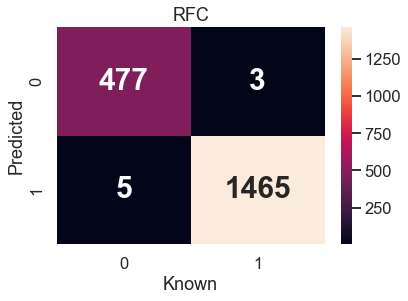

In [293]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})
ax.set(title='RFC')
ax.set(xlabel='Known')
ax.set(ylabel='Predicted')

## Gradient Boosting

Tuning Hyperparameters

In [294]:
from sklearn.ensemble import GradientBoostingClassifier

tree_list = [15, 25, 50, 100, 200, 400]

param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]} 

GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_GBC = GV_GBC.fit(X_train, y_train)
y_pred = GV_GBC.predict(X_test)
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=3, n_estimators=400, random_state=42)

Scores

In [295]:
print(classification_report(y_test, y_pred))
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       480
         1.0       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       0.99      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950

   accuracy  precision    recall        f1       auc
0  0.996923   0.999318  0.996599  0.997956  0.997258


Confusion Matrix

[Text(22.5, 0.5, 'Predicted')]

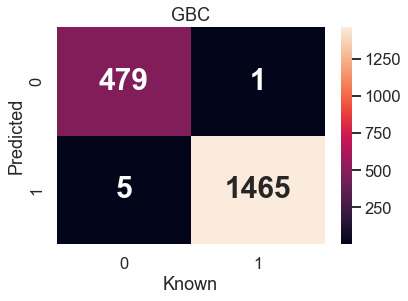

In [296]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})
ax.set(title='GBC')
ax.set(xlabel='Known')
ax.set(ylabel='Predicted')

## Stacking

Ensemble Based Methods. Finally, we will combine the methods of Logistic Regression and Gradient Boosted Trees

In [297]:
from sklearn.ensemble import VotingClassifier

estimators = [('LR_L2', lr_l2), ('GBC', GV_GBC)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)
y_pred = VC.predict(X_test)

Scores

In [298]:
print(classification_report(y_test, y_pred))
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       480
         1.0       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       1.00      0.99      1.00      1950
weighted avg       1.00      1.00      1.00      1950

   accuracy  precision    recall       f1       auc
0   0.99641   0.997281  0.997959  0.99762  0.994813


Confusion Matrix

[Text(22.5, 0.5, 'Predicted')]

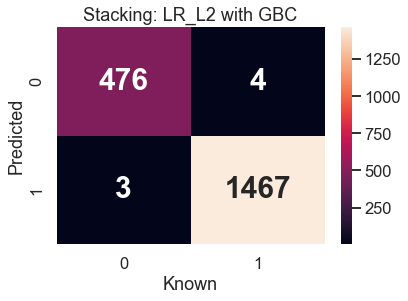

In [299]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 30, "weight": "bold"})
ax.set(title='Stacking: LR_L2 with GBC')
ax.set(xlabel='Known')
ax.set(ylabel='Predicted')

# Summary


In summary, the following can be highlighted. 

All the classifications were made yielded excelent results in terms of Accuracy. Broadly speaking, an increase in accuracy is appreciable as new models are proposed.

Accuracy results: 

* Logistic Regression: 0.98564
* K-Nearest Neighbors: 0.99077
* Suport Vector Machines: 0.99641
* Decision Trees: 0.99641
* Random Forest & Estra Random Forest: 0.99590 
* Gradient Boosting: 0.99692 
* Stacking Models: 0.99641 

As we can see all the models present strong results. So any of them can be recommended to optimize the accuracy, in particular the model with highest accuracy is Gradient Boosting Model.

With regard to the explainability. The simplest model to interpret turns out to be the Decision Tree Model. In this model we can easily interpret the logical path used to predict the target value. In turn, we can obtain the following results respect to the importance of the features. Finally, it is highlighted that the most important variables when making predictions are:

1) total_sulfur_dioxide				
2) chlorides
3) volatile_acidity

[Text(0, 0.5, 'Feature')]

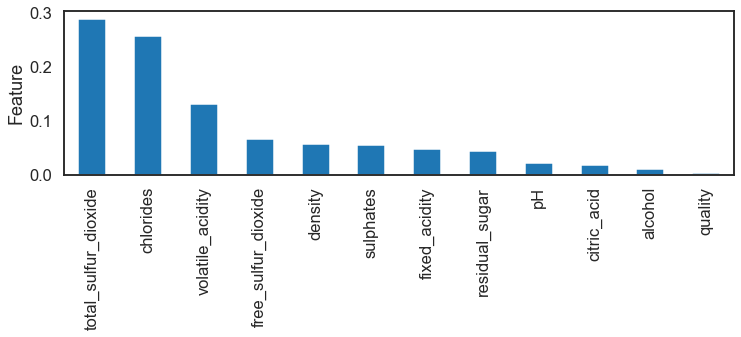

In [300]:
feature_imp = pd.Series(RF150.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(12, 3))
ax.set(ylabel='Relative Importance')
ax.set(ylabel='Feature')